# Linear regressions 

In [12]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sys 
import pandas as pd 
from sklearn.linear_model import LinearRegression

### Sample Data (study vs exam score) 

Slope coefficinets: 5.000000000000001
Intercept: 19.999999999999996


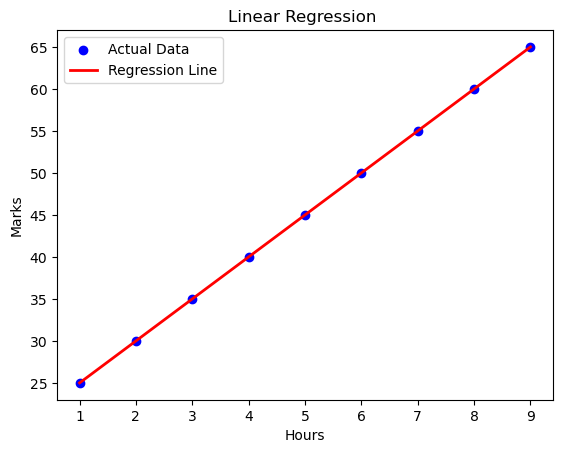

In [11]:
x=np.array([1,2,3,4,5,6,7,8,9]).reshape(-1,1) #independet variable(hours)
y=np.array([25,30,35,40,45,50,55,60,65]) #dependet variable (score)

#Create and train the Linear regression
model=LinearRegression()
model.fit(x,y)

#Predict Y values
y_pred=model.predict(x)

#Print the coefficients
print("Slope coefficinets:",model.coef_[0])
print("Intercept:",model.intercept_)

#Visulazations
plt.scatter(x,y,color='blue',label='Actual Data')
plt.plot(x,y_pred,color='red',linewidth=2,label='Regression Line')
plt.title('Linear Regression ')
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.legend()
plt.show()



# Multiple Regressions


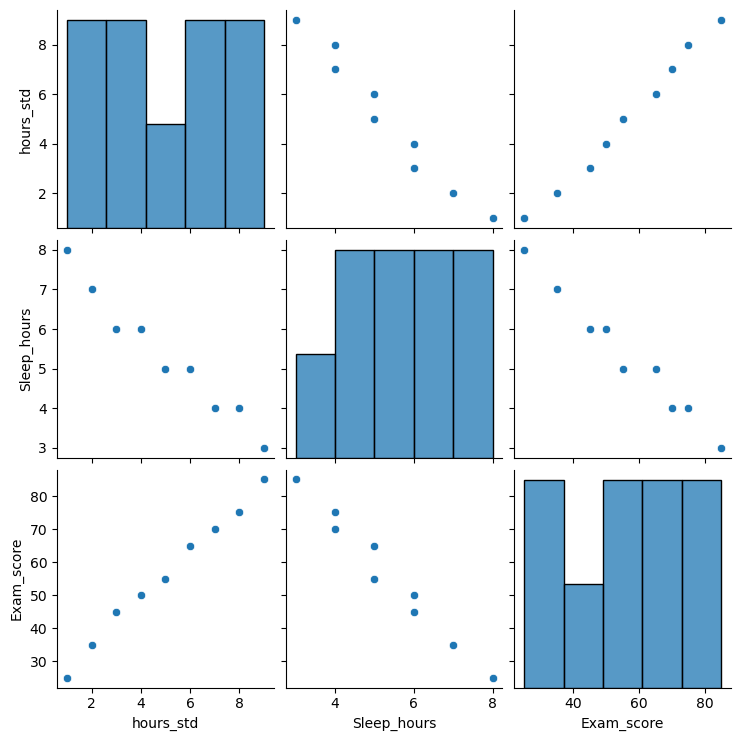

Coefficinets(slopes) [ 5.15151515 -3.40909091]
Intercept: 48.53535353535359
   hours_std  Sleep_hours  Exam_score  Predicted_Score
0          1            8          25        26.414141
1          2            7          35        34.974747
2          3            6          45        43.535354
3          4            6          50        48.686869
4          5            5          55        57.247475
5          6            5          65        62.398990
6          7            4          70        70.959596
7          8            4          75        76.111111
8          9            3          85        84.671717


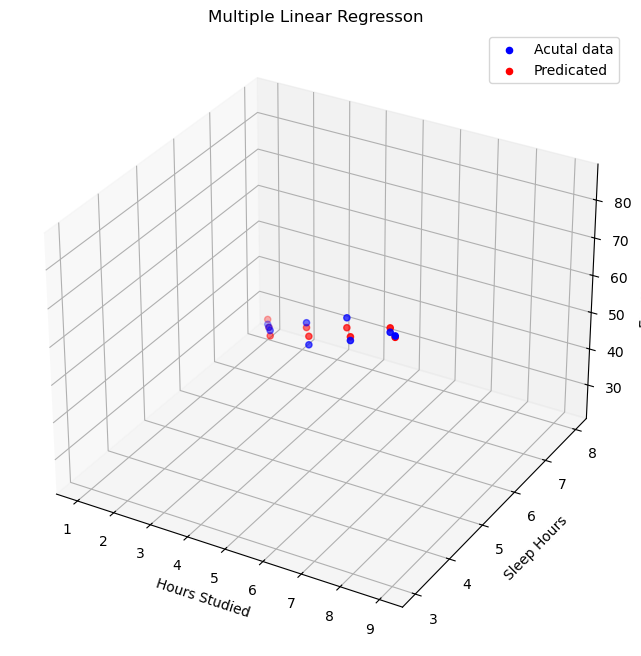

In [16]:
data={
    'hours_std':[1,2,3,4,5,6,7,8,9],
    'Sleep_hours':[8,7,6,6,5,5,4,4,3],
    'Exam_score':[25,35,45,50,55,65,70,75,85]
}
df2=pd.DataFrame(data)
#Visulzae relationships
sys.pairplot(df2)
plt.show()

#Prepare data
X=df2[['hours_std','Sleep_hours']] #Two independent variables
Y=df2['Exam_score'] #dependent variables

#Train models
model=LinearRegression()
model.fit(X,Y)

#Predic values
df2['Predicted_Score']=model.predict(X)

#Coefficients
print("Coefficinets(slopes)",model.coef_)
print("Intercept:",model.intercept_)

#compare acutal vs predict
print(df2)

#Visulazations
from mpl_toolkits.mplot3d import Axes3D
#create the 3D figure
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
#plot actual data points
ax.scatter(df2['hours_std'],df2['Sleep_hours'],df2['Exam_score'],color='blue',label='Acutal data')

#plot predicated data points
ax.scatter(df2['hours_std'],df2['Sleep_hours'],df2['Predicted_Score'],color='red',label='Predicated')

ax.set_xlabel('Hours Studied')
ax.set_ylabel("Sleep Hours")
ax.set_zlabel("Exam Score")
ax.set_title('Multiple Linear Regresson ')
ax.legend()
plt.show()

# Ridge,Lasso Regression

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sys 
from sklearn.linear_model import Ridge 

Coefficient (Slope) 3.66552160174172
Intercept 5.313450243706704


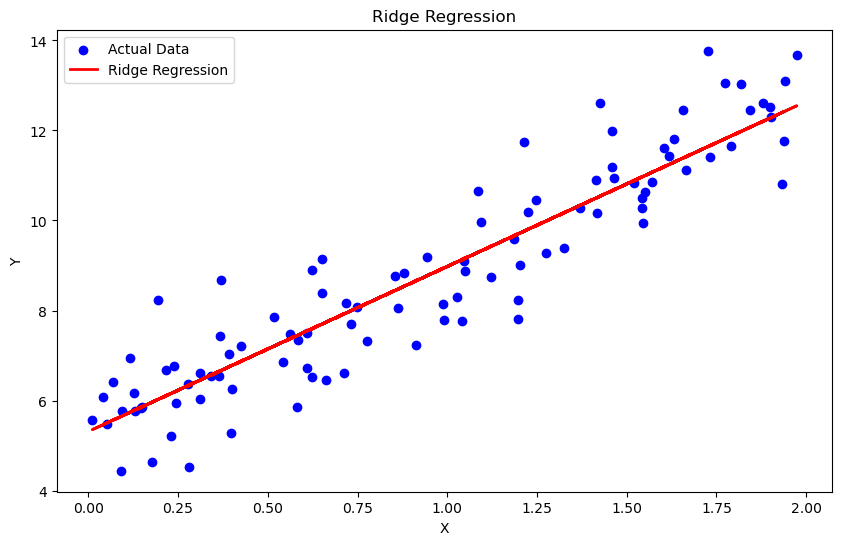

In [4]:
#Create the sample data
np.random.seed(42)
X=2*np.random.rand(100,1)
Y=5+4*X+np.random.randn(100,1)
#Convert to DataFrame 
data=pd.DataFrame({'X':X.flatten(),'Y':Y.flatten()})
#Ridge Regression
ridge=Ridge(alpha=1.0)
ridge.fit(X,Y)
#Predict
Y_predict=ridge.predict(X)

#Coefficient Slope
print("Coefficient (Slope)",ridge.coef_[0][0])
print("Intercept",ridge.intercept_[0])

#Visulazation
plt.figure(figsize=(10,6))
plt.scatter(X,Y,color='blue',label='Actual Data')
plt.plot(X,Y_predict,color='red',linewidth=2,label='Ridge Regression')
plt.title('Ridge Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()




# Lasso Regression

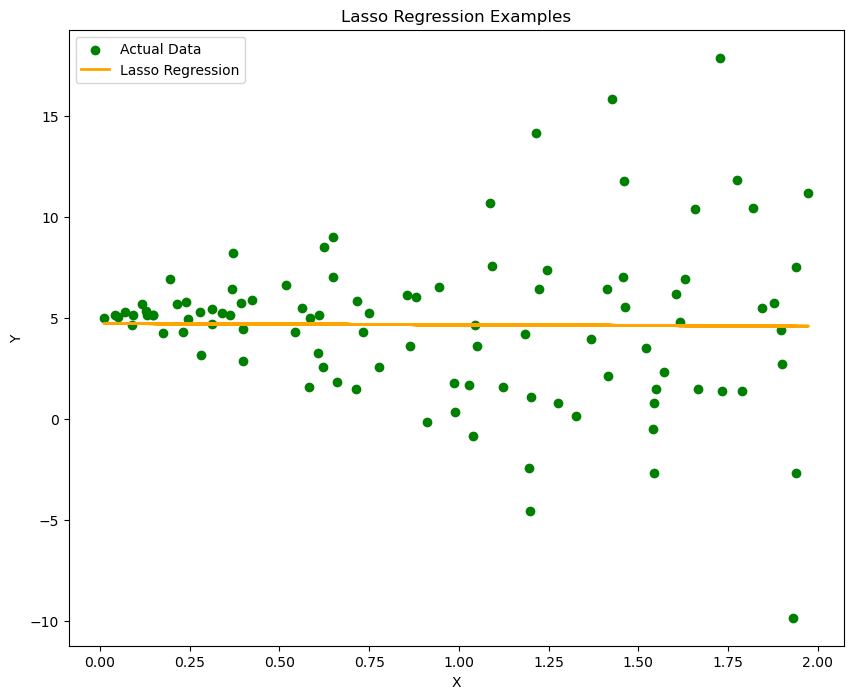

In [5]:
from sklearn.linear_model import Lasso
np.random.seed(42)
X=2*np.random.rand(100,1)
Y=5+4*X*np.random.randn(100,1)
np.random.randn(100,1)

#Conevert to DataFrame
data=pd.DataFrame({'X':X.flatten(),'Y':Y.flatten()})

#Lasso Regression
lasso=Lasso(alpha=0.1)
lasso.fit(X,Y)
#Predictions
Y_predict=lasso.predict(X)

#Visulazations
plt.figure(figsize=(10,8))
plt.scatter(X,Y,color='green',label='Actual Data')
plt.plot(X,Y_predict,linewidth=2,label='Lasso Regression',color='orange')
plt.title('Lasso Regression Examples')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


# Explanation of Statistics

Basic Statistics 
Mean of Hours:5.50
Mean of Marks:57.50
Var of Hours:8.25
std of Marks:19.27
correlation between Hours and Marks:0.95
Regression Statistics
intercept(b0):22.33
Slope (b1):6.39
R2 Score:0.91
mse Score:33.97
rmse Score:5.83


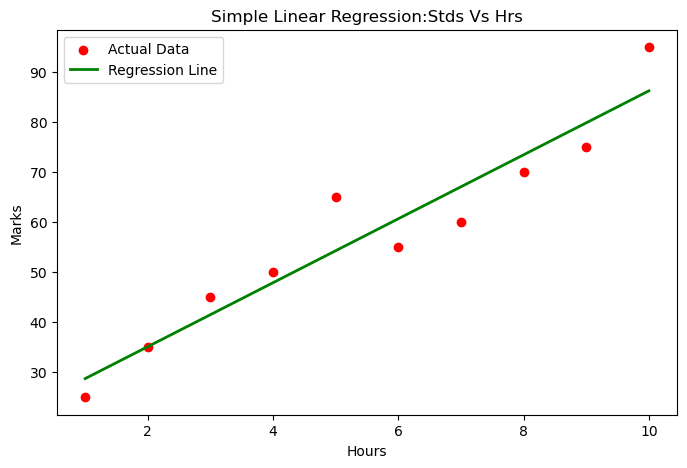

In [10]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
#create the sample data
data={
    'Hours':[1,2,3,4,5,6,7,8,9,10],
    'Marks':[25,35,45,50,65,55,60,70,75,95]
}
df=pd.DataFrame(data)
#calculate the some basic statisitcs operations
mean_x=np.mean(df['Hours'])
mean_y=np.mean(df['Marks'])
var_x=np.var(df['Hours'])
#var_y=np.var(df['Marks'])
std_y=np.std(df['Marks'])
corr=np.corrcoef(df['Hours'],df['Marks'])[0,1]

print("Basic Statistics ")
print(f"Mean of Hours:{mean_x:.2f}")
print(f"Mean of Marks:{mean_y:.2f}")
print(f"Var of Hours:{var_x:.2f}")
print(f"std of Marks:{std_y:.2f}")
print(f"correlation between Hours and Marks:{corr:.2f}")
#Prepare the data for regression
X=df[['Hours']]
Y=df['Marks']

#Create the Linear Regression Models
model=LinearRegression()
model.fit(X,Y)

#Predict the model
Y_predict=model.predict(X)

#Calculate the regression Statistics
r2=r2_score(Y,Y_predict)
mse=mean_squared_error(Y,Y_predict)
rmse=np.sqrt(mse)

print("Regression Statistics")
print(f"intercept(b0):{model.intercept_:.2f}")
print(f"Slope (b1):{model.coef_[0]:.2f}")
print(f"R2 Score:{r2:.2f}")
print(f"mse Score:{mse:.2f}")
print(f"rmse Score:{rmse:.2f}")

#Data Visulazations
plt.figure(figsize=(8,5))
plt.scatter(X,Y,color='red',label='Actual Data')
plt.plot(X,Y_predict,linewidth=2,color='green',label='Regression Line')
plt.title('Simple Linear Regression:Stds Vs Hrs')
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.legend()
plt.show()







# Train-Test Split in Regression

In [13]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score,mean_squared_error
from scipy import stats

#Create the sample 
data={
    'Hours':[1,2,3,4,5,6,7,8,9,10],
    'Marks':[25,35,40,45,55,65,70,85,90,95]
}
df=pd.DataFrame(data)
#Split the data into trainig and testing sets
x = df[['Hours']]   # correct shape: (10, 1)
y = df['Marks']      # correct shape: (10,)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

#Train a Linear Regressions
model=LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

#Evalute using the test data
print("R2 score:",round(r2_score(y_test,y_pred),2))
print("Mean squared erro:",round(mean_squared_error(y_test,y_pred),2))



R2 score: 0.99
Mean squared erro: 5.49


### t-test using scipy

In [14]:
marks=np.array([58,60,62,55,65,70,59,63,57,61])
#perform the one sample test
t_statics,p_value=stats.ttest_1samp(marks,60)
print("t-statiscis:",round(t_statics,3))
print("p-Valuue:",round(p_value,3))

#Decision
alpha=0.05
if p_value<alpha:
    print("Reject H0-Mean is siginigficantly different from 60")
else:
    print('Fail to Reject H0 Mean is not signingincatly different from 60')


t-statiscis: 0.732
p-Valuue: 0.483
Fail to Reject H0 Mean is not signingincatly different from 60
